In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [26]:
# Read and Store the dataset
dataset = pd.read_csv('water_potability.csv')

In [27]:
# Display the first five records in the dataset
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [28]:
# Display the columns and records
print('Number of Features: ', dataset.shape[1])
print('Number of Records: ', dataset.shape[0])

Number of Features:  10
Number of Records:  3276


In [29]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [30]:
dataset.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [31]:
print('Median of ph value: ', dataset['ph'].median()) 
print('Median of Sulfate value: ', dataset['Sulfate'].median())
print('Median of Trihalomethanes value: ', dataset['Trihalomethanes'].median())

Median of ph value:  7.036752103833548
Median of Sulfate value:  333.073545745888
Median of Trihalomethanes value:  66.62248509808484


In [32]:
dataset['ph'] = dataset['ph'].fillna(dataset['ph'].median())
dataset['Sulfate'] = dataset['Sulfate'].fillna(dataset['Sulfate'].median())
dataset['Trihalomethanes'] = dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].median())

dataset.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [33]:
features = dataset.drop('Potability', axis=1)
label = dataset.Potability

print('Features using for Training:')
features.head()

Features using for Training:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [39]:
train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size = 0.25, random_state = 44)

In [40]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2457, 9)
Training Labels Shape: (2457,)
Testing Features Shape: (819, 9)
Testing Labels Shape: (819,)


In [44]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = RandomForestClassifier(n_estimators = 350)
model.fit(train_features, train_labels)
predicted = model.predict(test_features)

In [45]:
predictions = model.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.33 degrees.


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predicted)

0.6727716727716728

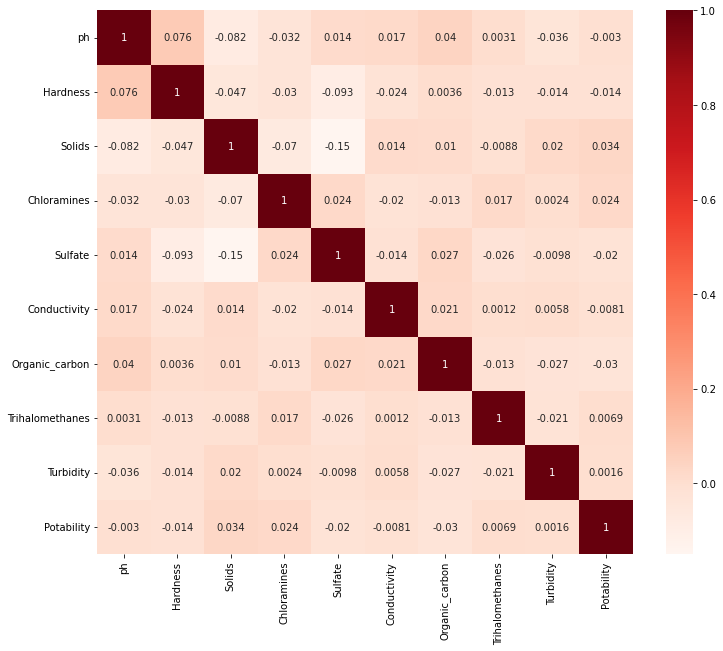

In [24]:
import seaborn as sns

plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [294]:
x = dataset.iloc[:,1:4]
y = dataset.iloc[:,9]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658


In [295]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [296]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2620, 9)
(2620,)
(656, 9)
(656,)


In [297]:
from keras.models import Sequential
from keras.layers import Dense

In [298]:
model = Sequential()
model.add(Dense(32, input_dim = 3, activation='relu')) ##hidden layer 1
model.add(Dense(64, activation='relu')) ##hidden layer 2
model.add(Dense(1, activation='sigmoid'))

In [299]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [300]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                320       
                                                                 
 dense_31 (Dense)            (None, 64)                2112      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [301]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
82/82 [==============================] - 1s 3ms/step - loss: 0.3882 - accuracy: 0.6118
Epoch 2/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.6118
Epoch 3/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.6118
Epoch 4/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.6118
Epoch 5/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.6118
Epoch 6/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.6118
Epoch 7/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.6118
Epoch 8/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.6118
Epoch 9/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.6118
Epoch 10/10
82/82 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.6118


In [302]:
scores = model.evaluate(x_test, y_test)
print(scores) ##returns loss and accuracy

21/21 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.6067
[0.39329269528388977, 0.6067073345184326]


In [303]:
predictions = model.predict(x_test)
predictions

21/21 [==============================] - 0s 2ms/step


array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.000000